## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

### Epoch = 500

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 10s 205us/step - loss: 1.9362 - acc: 0.3015 - val_loss: 1.7375 - val_acc: 0.3812
Epoch 2/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.7105 - acc: 0.3861 - val_loss: 1.6230 - val_acc: 0.4225
Epoch 3/500
50000/50000 [==============================] - 3s 61us/step - loss: 1.6141 - acc: 0.4237 - val_loss: 1.6066 - val_acc: 0.4263
Epoch 4/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.5457 - acc: 0.4504 - val_loss: 1.5149 - val_acc: 0.4585
Epoch 5/500
50000/50000 [==============================] - 3s 61us/step - loss: 1.5065 - acc: 0.4634 - val_loss: 1.4874 - val_acc: 0.4718
Epoch 6/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.4585 - acc: 0.4818 - val_loss: 1.4979 - val_acc: 0.4633
Epoch 7/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.4394 - acc: 0.4880 - val_loss: 1.4913 

50000/50000 [==============================] - 3s 58us/step - loss: 0.5375 - acc: 0.8071 - val_loss: 2.0514 - val_acc: 0.5064
Epoch 60/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.5236 - acc: 0.8120 - val_loss: 2.0194 - val_acc: 0.5129
Epoch 61/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.5105 - acc: 0.8156 - val_loss: 2.0617 - val_acc: 0.5029
Epoch 62/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.5082 - acc: 0.8184 - val_loss: 2.0942 - val_acc: 0.5034
Epoch 63/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.5120 - acc: 0.8164 - val_loss: 2.1312 - val_acc: 0.5117
Epoch 64/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.4882 - acc: 0.8249 - val_loss: 2.1458 - val_acc: 0.5130
Epoch 65/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.4889 - acc: 0.8244 - val_loss: 2.1700 - val_acc: 0.5057
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 3s 57us/step - loss: 0.2535 - acc: 0.9073 - val_loss: 3.5662 - val_acc: 0.4954
Epoch 119/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.2115 - acc: 0.9242 - val_loss: 3.5550 - val_acc: 0.5009
Epoch 120/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.2112 - acc: 0.9234 - val_loss: 3.5134 - val_acc: 0.4956
Epoch 121/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.2341 - acc: 0.9166 - val_loss: 3.5831 - val_acc: 0.4865
Epoch 122/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.2728 - acc: 0.9028 - val_loss: 3.4904 - val_acc: 0.4921
Epoch 123/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.2582 - acc: 0.9083 - val_loss: 3.5931 - val_acc: 0.4904
Epoch 124/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.2368 - acc: 0.9157 - val_loss: 3.4754 - val_acc: 0.5048
Epoch 125/500
50000/

50000/50000 [==============================] - 3s 61us/step - loss: 0.1553 - acc: 0.9447 - val_loss: 4.1626 - val_acc: 0.4980
Epoch 177/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.1315 - acc: 0.9533 - val_loss: 4.2267 - val_acc: 0.5024
Epoch 178/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.1708 - acc: 0.9400 - val_loss: 4.2285 - val_acc: 0.4934
Epoch 179/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.1837 - acc: 0.9361 - val_loss: 4.1999 - val_acc: 0.4971
Epoch 180/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.2018 - acc: 0.9307 - val_loss: 4.1819 - val_acc: 0.4927
Epoch 181/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.1613 - acc: 0.9430 - val_loss: 4.1984 - val_acc: 0.5007
Epoch 182/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.0944 - acc: 0.9673 - val_loss: 4.2888 - val_acc: 0.5005
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 3s 55us/step - loss: 0.1446 - acc: 0.9511 - val_loss: 4.6030 - val_acc: 0.4989
Epoch 235/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0787 - acc: 0.9726 - val_loss: 4.6027 - val_acc: 0.4958
Epoch 236/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.0692 - acc: 0.9757 - val_loss: 4.6122 - val_acc: 0.4939
Epoch 237/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.1020 - acc: 0.9634 - val_loss: 4.7134 - val_acc: 0.4958
Epoch 238/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.1392 - acc: 0.9520 - val_loss: 4.6517 - val_acc: 0.5004
Epoch 239/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1509 - acc: 0.9501 - val_loss: 4.7390 - val_acc: 0.4906
Epoch 240/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.1540 - acc: 0.9478 - val_loss: 4.6248 - val_acc: 0.4889
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 3s 58us/step - loss: 0.1637 - acc: 0.9465 - val_loss: 4.9905 - val_acc: 0.4828
Epoch 293/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.1803 - acc: 0.9425 - val_loss: 4.8907 - val_acc: 0.4908
Epoch 294/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.0631 - acc: 0.9782 - val_loss: 4.8951 - val_acc: 0.4945
Epoch 295/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.0428 - acc: 0.9857 - val_loss: 4.9170 - val_acc: 0.4950
Epoch 296/500
50000/50000 [==============================] - 3s 57us/step - loss: 0.0794 - acc: 0.9735 - val_loss: 5.0075 - val_acc: 0.4875
Epoch 297/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.1705 - acc: 0.9451 - val_loss: 4.9198 - val_acc: 0.4748
Epoch 298/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.1677 - acc: 0.9475 - val_loss: 5.0165 - val_acc: 0.4872
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 3s 59us/step - loss: 0.0741 - acc: 0.9756 - val_loss: 5.0293 - val_acc: 0.4921
Epoch 351/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.0688 - acc: 0.9758 - val_loss: 4.8831 - val_acc: 0.4994
Epoch 352/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0575 - acc: 0.9805 - val_loss: 4.9800 - val_acc: 0.5021
Epoch 353/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.0737 - acc: 0.9744 - val_loss: 5.0019 - val_acc: 0.4981
Epoch 354/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.1239 - acc: 0.9593 - val_loss: 4.9281 - val_acc: 0.4967
Epoch 355/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1261 - acc: 0.9584 - val_loss: 4.9596 - val_acc: 0.4919
Epoch 356/500
50000/50000 [==============================] - 3s 70us/step - loss: 0.0943 - acc: 0.9693 - val_loss: 4.9869 - val_acc: 0.4979
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 3s 59us/step - loss: 0.0150 - acc: 0.9963 - val_loss: 4.9389 - val_acc: 0.5042
Epoch 409/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.0058 - acc: 0.9994 - val_loss: 4.9655 - val_acc: 0.5058
Epoch 410/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.0045 - acc: 0.9997 - val_loss: 4.9938 - val_acc: 0.5055
Epoch 411/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.0039 - acc: 0.9998 - val_loss: 5.0427 - val_acc: 0.5005
Epoch 412/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 5.0540 - val_acc: 0.5057
Epoch 413/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.0029 - acc: 0.9998 - val_loss: 5.0735 - val_acc: 0.5068
Epoch 414/500
50000/50000 [==============================] - 3s 61us/step - loss: 0.0031 - acc: 0.9997 - val_loss: 5.0979 - val_acc: 0.5046
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 3s 61us/step - loss: 0.0271 - acc: 0.9919 - val_loss: 4.9945 - val_acc: 0.4956
Epoch 467/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.2707 - acc: 0.9216 - val_loss: 4.8593 - val_acc: 0.4921
Epoch 468/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.0969 - acc: 0.9667 - val_loss: 4.9126 - val_acc: 0.4921
Epoch 469/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0481 - acc: 0.9838 - val_loss: 4.9706 - val_acc: 0.4952
Epoch 470/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.0324 - acc: 0.9891 - val_loss: 4.8934 - val_acc: 0.5033
Epoch 471/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.0207 - acc: 0.9939 - val_loss: 4.9358 - val_acc: 0.5023
Epoch 472/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.0097 - acc: 0.9983 - val_loss: 4.9898 - val_acc: 0.5013
Epoch 473/500
50000/50000 [=======

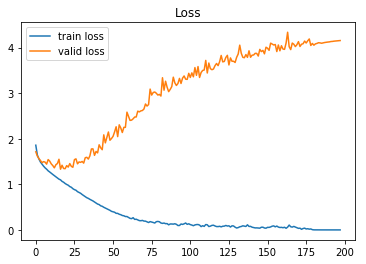

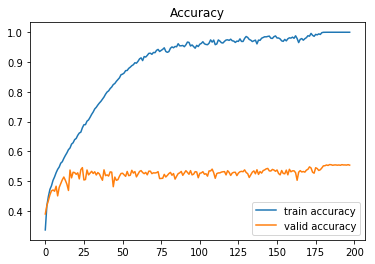

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

### Optimizer = SGD

In [11]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 63us/step - loss: 1.8582 - acc: 0.3355 - val_loss: 1.7827 - val_acc: 0.3636
Epoch 2/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.6436 - acc: 0.4178 - val_loss: 1.5971 - val_acc: 0.4333
Epoch 3/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.5606 - acc: 0.4463 - val_loss: 1.6461 - val_acc: 0.4140
Epoch 4/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.5002 - acc: 0.4694 - val_loss: 1.5594 - val_acc: 0.4379
Epoch 5/100
50000/50000 [==============================] - 3s 56us/step - loss: 1.4440 - acc: 0.4873 - val_loss: 1.4762 - val_acc: 0.4668
Epoch 6/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.4068 - acc: 0.5004 - val_loss: 1.4677 - val_acc: 0.4766
Epoch 7/100
50000/50000 [==============================] - 3s 55us/step - loss: 1.3640 - acc: 0.5153 - val_loss: 1.4726 - 

50000/50000 [==============================] - 3s 54us/step - loss: 0.2902 - acc: 0.8982 - val_loss: 2.3377 - val_acc: 0.5193
Epoch 60/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.2863 - acc: 0.8992 - val_loss: 2.3578 - val_acc: 0.5298
Epoch 61/100
50000/50000 [==============================] - 3s 57us/step - loss: 0.2695 - acc: 0.9049 - val_loss: 2.4136 - val_acc: 0.5160
Epoch 62/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.2607 - acc: 0.9072 - val_loss: 2.3743 - val_acc: 0.5279
Epoch 63/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.2525 - acc: 0.9113 - val_loss: 2.4348 - val_acc: 0.5306
Epoch 64/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.2370 - acc: 0.9155 - val_loss: 2.4408 - val_acc: 0.5218
Epoch 65/100
50000/50000 [==============================] - 3s 56us/step - loss: 0.2462 - acc: 0.9131 - val_loss: 2.5044 - val_acc: 0.5242
Epoch 66/100
50000/50000 [==============

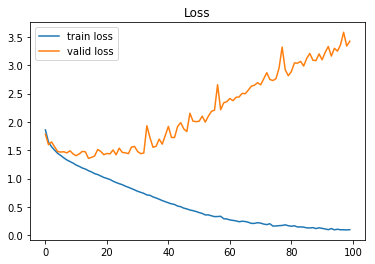

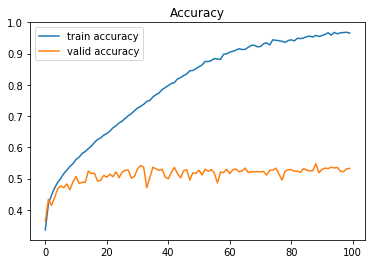

In [13]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()